In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
def sharpe_ratio(df):
    # Calculate daily returns
    df['returns'] = df['Wealth'].pct_change()
    
    # Calculate excess returns by subtracting risk-free rate
    df['excess_returns'] = df['returns'] - df['RF']
    
    # Calculate rolling 21 day mean of excess returns
    df['mean_excess_returns'] = df['excess_returns'].rolling(window=60).mean()
    
    # Calculate rolling 21 day standard deviation of excess returns
    df['std_excess_returns'] = df['excess_returns'].rolling(window=60).std()
    
    # Calculate rolling 21 day Sharpe Ratio
    df['SharpeRatio'] = df['mean_excess_returns'] / df['std_excess_returns']
    
    # Drop intermediate columns
    df.drop(['returns', 'excess_returns', 'mean_excess_returns', 'std_excess_returns'], axis=1, inplace=True)
    
    # Return dataframe with date and SharpeRatio columns
    return df[['date', 'SharpeRatio']]

In [3]:
datatype = 'broad'
EW_value = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
# TTrain_value = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))

In [4]:
plt.close("all")
plt.rcParams["font.family"] ="serif"
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['text.usetex'] = True

In [5]:
sharpe_results = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])


In [6]:
sharpe_results_broad

NameError: name 'sharpe_results_broad' is not defined

In [7]:
print(sharpe_results_broad.to_latex(index=False, float_format="{:.4f}".format))

NameError: name 'sharpe_results_broad' is not defined

In [279]:
datatype = 'broad'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $T$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

For MVO. Mean: 0.0124464188943684. Vol: 0.01972862968819569. Sharpe: 0.6308810642746017
For MVO - Learn $T$. Mean: 0.033206770312067285. Vol: 0.028817354396985836. Sharpe: 1.1523184902615682
For Robust MVO. Mean: 0.010920479870547548. Vol: 0.036162970837489414. Sharpe: 0.30197961112272637


C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


For MVO. Mean: 0.004009920869098969. Vol: 0.008766735735048086. Sharpe: 0.45740181868011726
For MVO - Learn $T$. Mean: 0.0034778705348364448. Vol: 0.008642048576520355. Sharpe: 0.40243589283743403
For Robust MVO. Mean: 0.000508236483424955. Vol: 0.005953472376991892. Sharpe: 0.08536807618174444


C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


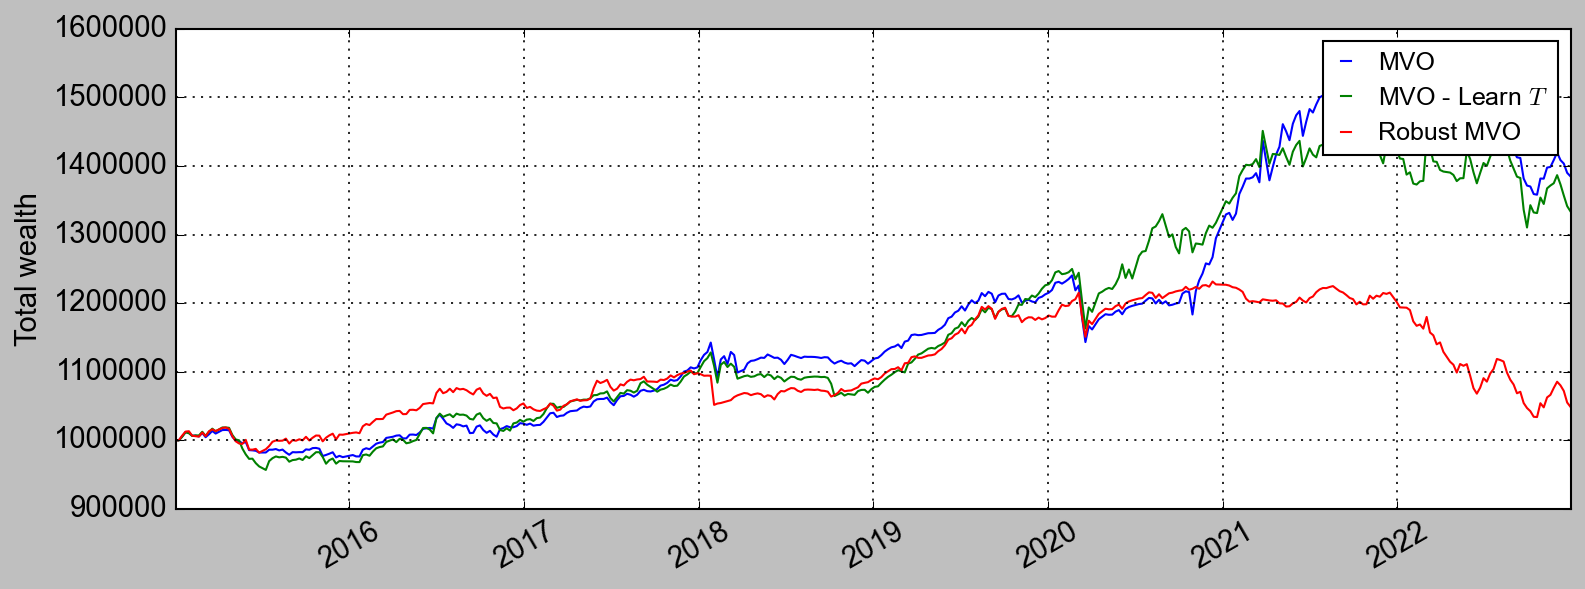

In [287]:
datatype = 'cross_asset'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_lookback10_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $T$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

<AxesSubplot:>

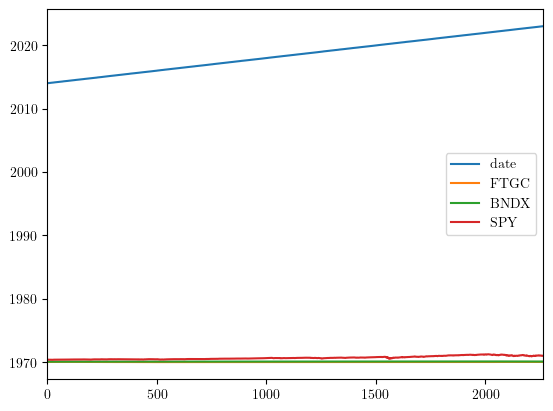

In [ ]:
'''
(i) apply ledoit and wolfes shrinkage estimate to the covariance of RP as a competitor
(ii) make it extremely clear via figures that we are essentially just predicting when EW beats RP (i.e. the rolling sharpe over the training set figure)
(iii) consider the case where we are learning the norm defined by the diagonal matrix
(iv) do an experiment on learning alpha where the resulting portfolio is alpha*x_{ew} + alpha x_{rp} (i.e. formulate this as a regression in alpha over the training set) ... x_{rp} and x_{ew} would have be constant
(v) learn some prediction model for when EW beats RP and embed that in the end to end distributionally robust RP i.e. identify features that predict the amount of correlation in the market) - we could construct a contrived example for covid period (i.e. have some analyst predict that correlations will spike so we use RP during 2020 crash which obviously beats EW)

'''




In [ ]:
# Ledoit-Wolf Shrinkage
def shrinkage(returns):
    """Shrinks sample covariance matrix towards constant correlation unequal variance matrix.
    Ledoit & Wolf ("Honey, I shrunk the sample covariance matrix", Portfolio Management, 30(2004),
    110-119) optimal asymptotic shrinkage between 0 (sample covariance matrix) and 1 (constant
    sample average correlation unequal sample variance matrix).
    Paper:
    http://www.ledoit.net/honey.pdf
    Matlab code:
    https://www.econ.uzh.ch/dam/jcr:ffffffff-935a-b0d6-ffff-ffffde5e2d4e/covCor.m.zip
    Special thanks to Evgeny Pogrebnyak https://github.com/epogrebnyak
    :param returns:
        t, n - returns of t observations of n shares.
    :return:
        Covariance matrix, sample average correlation, shrinkage.
    """
    t, n = returns.shape
    mean_returns = np.mean(returns, axis=0, keepdims=True)
    returns -= mean_returns
    sample_cov = returns.transpose() @ returns / t

    # sample average correlation
    var = np.diag(sample_cov).reshape(-1, 1)
    sqrt_var = var ** 0.5
    unit_cor_var = sqrt_var * sqrt_var.transpose()
    average_cor = ((sample_cov / unit_cor_var).sum() - n) / n / (n - 1)
    prior = average_cor * unit_cor_var
    np.fill_diagonal(prior, var)

    # pi-hat
    y = returns ** 2
    phi_mat = (y.transpose() @ y) / t - sample_cov ** 2
    phi = phi_mat.sum()

    # rho-hat
    theta_mat = ((returns ** 3).transpose() @ returns) / t - var * sample_cov
    np.fill_diagonal(theta_mat, 0)
    rho = (
        np.diag(phi_mat).sum()
        + average_cor * (1 / sqrt_var @ sqrt_var.transpose() * theta_mat).sum()
    )

    # gamma-hat
    gamma = np.linalg.norm(sample_cov - prior, "fro") ** 2

    # shrinkage constant
    kappa = (phi - rho) / gamma
    shrink = max(0, min(1, kappa / t))

    # estimator
    sigma = shrink * prior + (1 - shrink) * sample_cov

    return sigma, average_cor, shrink

In [283]:
%matplotlib inline

For EW. Mean: 0.004519613116386205. Vol: 0.013125245717531465. Sharpe: 0.3443450289352932
For RP. Mean: 0.002074714193389178. Vol: 0.007150602313705242. Sharpe: 0.290145375503916
For Learn $\delta$. Mean: 0.0041516203109482645. Vol: 0.011608071702413061. Sharpe: 0.35764943716579856
For Learn T. Mean: 0.007588806818564636. Vol: 0.017115988616047965. Sharpe: 0.44337531350361875
For RP w/ Shrinkage. Mean: 0.0021538801826039775. Vol: 0.007263546539357137. Sharpe: 0.2965328536044057
For Learn T - Diagonal. Mean: 0.0019484057943357617. Vol: 0.01711463713924994. Sharpe: 0.11384441156905252


C:\Users\Rafay\AppData\Local\Temp\ipykernel_18188\647677290.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_18188\647677290.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_18188\647677290.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_18188\647677290.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

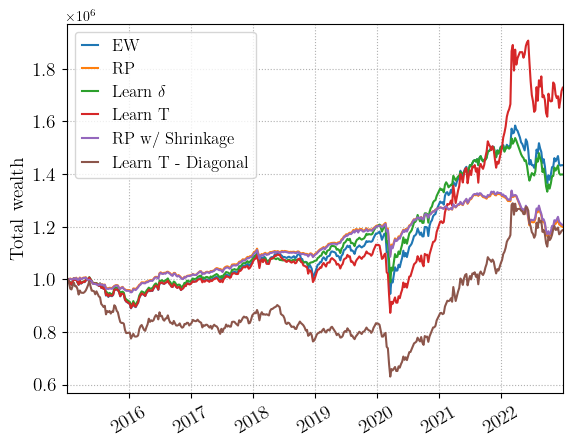

In [19]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_lookback52_value.pkl'.format(datatype))
TTrain_value_broad = pd.read_pickle('ResultsDRRPWTTrained_{}_lookback52_value.pkl'.format(datatype))
DRRPWTTrained_Diagonal_value_broad = pd.read_pickle('ResultsDRRPWTTrained_Diagonal_{}_lookback52_value.pkl'.format(datatype))
RP_Shrinkage_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_lookback10_value.pkl'.format(datatype))

fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn T', 'RP w/ Shrinkage', 'Learn T - Diagonal']
frames = [EW_value_broad, RP_value_broad, NN_value_broad, TTrain_value_broad, RP_Shrinkage_value_broad, DRRPWTTrained_Diagonal_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

ValueError: x and y must have same first dimension, but have shapes (403,) and (78,)

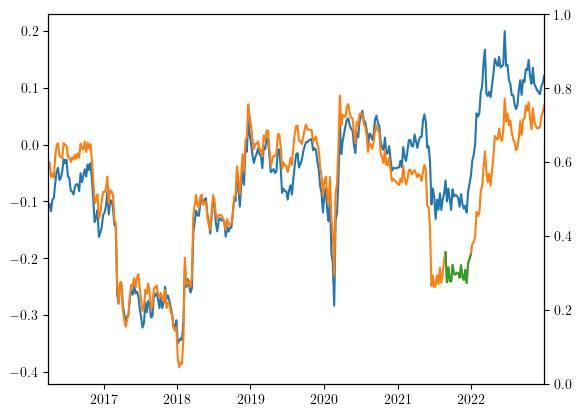

In [23]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
RPShrink0_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'RP - Shrinkage 0']
frames = [EW_value_broad, RP_value_broad, RPShrink0_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])

with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
    delta_vals = pickle.load(f)
    
ax2 = ax.twinx()
ax2.plot(EW_value_broad['date'], delta_vals, 'g-')

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
ax2.set_ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

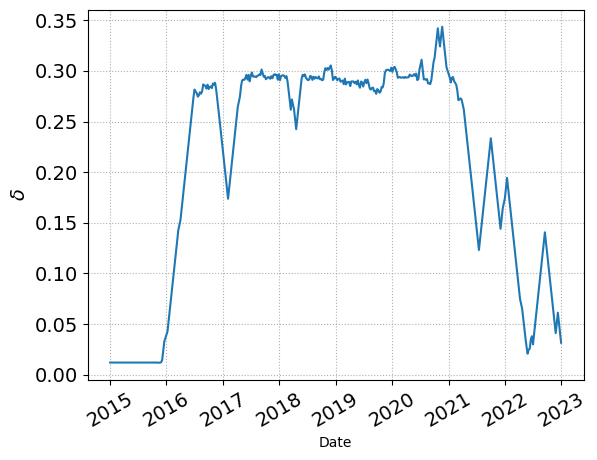

In [18]:
plt.plot(NN_value_broad['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

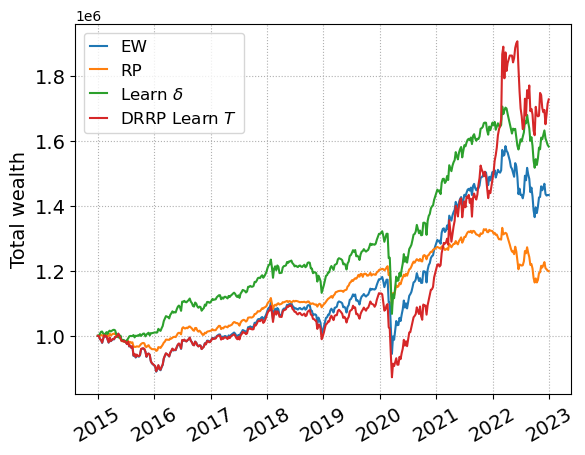

In [5]:
datatype = 'cross_asset'
EW_value_ca = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_ca = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value_ca = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
TTrain_value_ca = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_ca, RP_value_ca, NN_value_ca, TTrain_value_ca]
sharpe_results_ca = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [77]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn $T$']
frames = [EW_value, RP_value, NN_value, TTrain_value]
for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

NameError: name 'TTrain_value' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
def LoadData(path_to_data, e2e=True, datatype='broad'):
    if e2e:
        path_to_returns = r'{}\asset_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_prices = r'{}\assetprices_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_factors = r'{}\factor_weekly_{}.pkl'.format(path_to_data, datatype)

        returns = pd.read_pickle(path_to_returns)
        prices = pd.read_pickle(path_to_prices)
        factors = pd.read_pickle(path_to_factors)

        assets_list = prices.columns.to_list()

        returns = returns.reset_index()
        prices = prices.reset_index()
        factors = factors.reset_index()

        factors = factors.rename(columns={"Date": "date", "Mkt-RF": "RF"})
        factors = factors[['date'] + factors_list]

        return returns, assets_list, prices, factors

    path_to_prices = r'{}\prices.csv'.format(path_to_data)
    path_to_factors = r'{}\3factors.csv'.format(path_to_data)

    prices = pd.read_csv(path_to_prices)
    factors = pd.read_csv(path_to_factors)

    assets_list = list(prices['symbol'].unique())

    assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']

    pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                    index='date', 
                                    columns='symbol', 
                                    aggfunc=np.mean),2)
    pivot_prices = pivot_prices.reset_index()
    pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
    factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

    pivot_prices = pivot_prices.set_index('date')
    returns = pivot_prices.pct_change()
    pivot_prices = pivot_prices.reset_index()
    returns = returns.reset_index()
    returns = returns.merge(factors, on='date', how='left')
    returns = returns.drop(['Date'], axis=1)
    returns = returns.dropna()

    return returns, assets_list_cleaned, pivot_prices, []


Text(0, 0.5, 'Rolling 30-day Volatility')

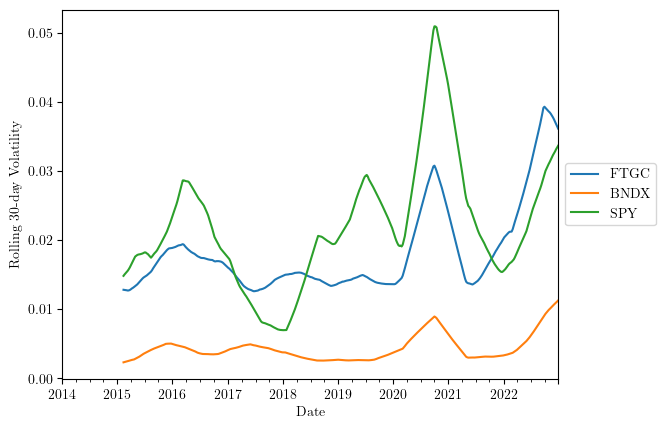

In [123]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
returns = returns.set_index('date')
returns.rolling(30).std().rolling(30).mean().plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Rolling 30-day Volatility')

Text(0, 0.5, 'Log Prices')

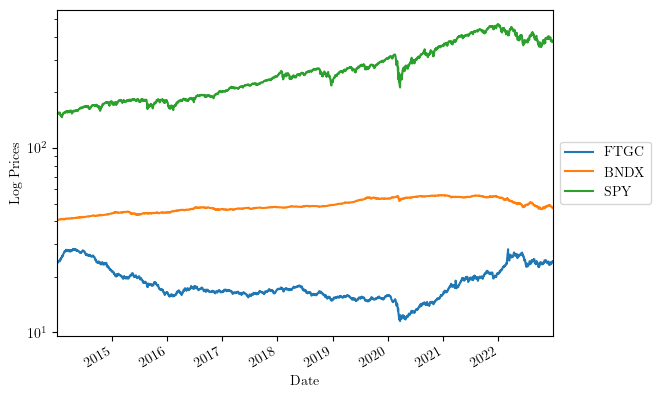

In [198]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
prices = prices.set_index('date')
returns = returns.set_index('date')
prices.plot(logy=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Log Prices')

In [41]:
import numpy as np

Text(0, 0.5, 'Av')

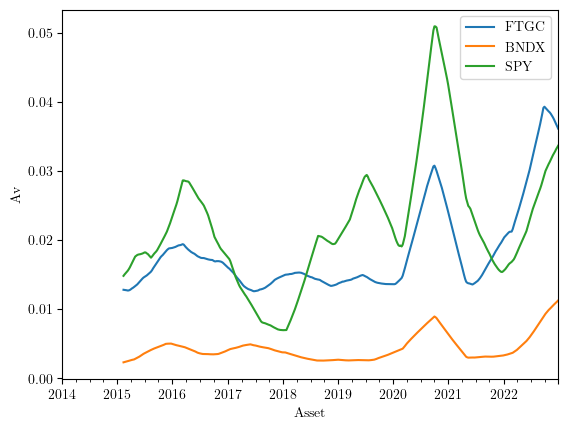

In [83]:
returns.rolling(30).std().rolling(30).mean().plot()
plt.xlabel('Asset')
plt.ylabel('Av')

Text(0, 0.5, '30-Day Rolling Correlation of Assets')

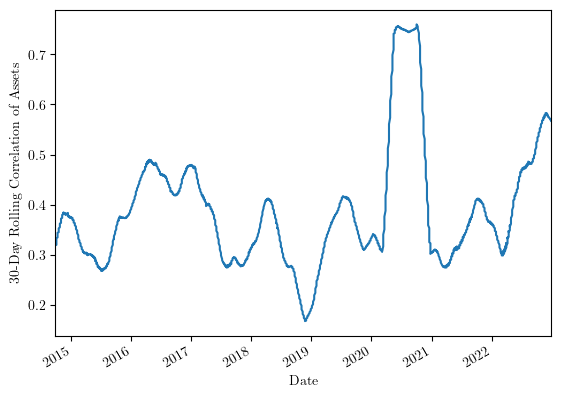

In [70]:
n = len(columns)
returns = returns.set_index('date')
rollingcor = returns.rolling(30).corr()
rollingcor.reset_index().drop('level_1', axis=1).set_index('date').mean(axis=1).rolling(30).mean().plot()
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Correlation of Assets')

In [125]:
(list(returns.columns))

['FTGC', 'BNDX', 'SPY']

In [122]:
"""
\begin{table}
\begin{description}
\item{Raw term frequencies.}
\end{description}
    \begin{tabular}{|l|l|l|l|l|}
        \hline
        term      & Dawn & Beatrice & She & Regeneration \\ \hline
        happiness & 40   & 20       & 0   & 7            \\ 
        surprise  & 23   & 43       & 7   & 0            \\ 
        family    & 32   & 0        & 15  & 12           \\ 
        adventure & 0    & 7        & 6   & 0            \\
        \hline
    \end{tabular}
\end{table}
"""

figure_describe = "Assets Used - Broad Equity Assets."
list(returns.columns)
header_row = [" "]*len(list(returns.columns))
row_1 = list(returns.columns)[0:5]
row_2 = list(returns.columns)[5:10]
row_3 = list(returns.columns)[10:15]
row_4 = list(returns.columns)[15:20]
print(len(row_1))
print(len(row_2))
print(len(row_3))
print(len(row_4))
row_data = [row_1, row_2, row_3, row_4]
print(row_data)
def write_table(assembled_parts):
    """
    input: assembled_parts
    assembled_parts will consist out of (in sequence)
    - figure_describe:  used for \item{ }
    - header_row:       contains names of the table header
    - row_data:         multi-dimensional list
    """
    
    figure_describe, header_row, row_data = assembled_parts

    # internal helper function
    def convert_row_to_latex(spacers, row_input):
        parsed = ""
        for distance in spacers:
            parsed += (" & %"+str(-distance)+"s")
        parsed = parsed[2:]
        parsed = parsed % tuple(row_input)
        parsed += " \\\\"
        return parsed

    def calculate_spacers():
        temp_cells = [header_row] + row_data
        cell_lengths = []
        for cell in range(len(header_row)):
            max_length = 0
            for col in range(len(temp_cells)):
                print("({}, {})".format(col, cell))
                cell_length = len(temp_cells[col][cell])
                if cell_length > max_length:
                    max_length = cell_length
            cell_lengths.append(max_length)

        return cell_lengths

    num_cols = len(header_row)
    fence_posts = "".join(["|l" for i in range(num_cols)]) + "|"
    
    print('\\begin{table}')
    print('\\begin{description}')
    print('\\item{%s}' % (figure_describe))
    print('\\end{description}')
    print('\t\\begin{tabular}{%s}' % (fence_posts))
    print('\t\t\\hline')

    # let's format this for human reading of the output.
    spacers = calculate_spacers()
    
    for row in range(len(row_data)+1):
        if row == 0:
            headers = convert_row_to_latex(spacers, header_row) + " \\hline"
            print("\t\t" + headers)
        else:
            row_content = convert_row_to_latex(spacers, row_data[row-1])
            print('\t\t' + row_content)
    print('\t\t\\hline')
    print('\t\\end{tabular}')
    print('\\end{table}')      

assembled_parts = [figure_describe, header_row, row_data]
write_table(assembled_parts)

5
5
5
5
[['AAPL', 'MSFT', 'AMZN', 'C', 'JPM'], ['BAC', 'XOM', 'HAL', 'MCD', 'WMT'], ['COST', 'CAT', 'LMT', 'JNJ', 'PFE'], ['DIS', 'VZ', 'T', 'ED', 'NEM']]
\begin{table}
\begin{description}
\item{Assets Used - Broad Equity Assets.}
\end{description}
	\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
		\hline
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(0, 1)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(0, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(0, 3)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(4, 4)
(0, 5)
(1, 5)


IndexError: list index out of range

In [15]:
import pickle

In [16]:
with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
    delta_vals = pickle.load(f)

In [17]:
plt.plot(EW_value['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

NameError: name 'EW_value' is not defined

In [87]:
EW_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))

In [48]:
EW_value = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))


<AxesSubplot:xlabel='date'>

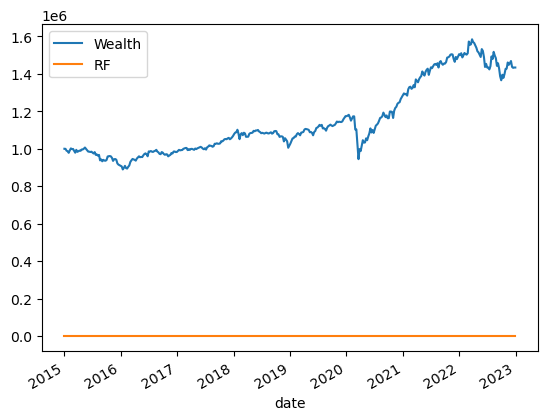

In [69]:
EW_value.plot(x='date')

In [126]:
datatype = 'cross_asset'
EW_value_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_value_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_value_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_value_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))


In [ ]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_holdings, RP_value_holdings, NN_value_holdings, TTrain_value_holdings]
for indx, frame in enumerate(frames):
    frame.plot.bar()
    # plt.plot(label=names[indx])
    break
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)


In [206]:
import SGCharts
from distinctipy import distinctipy

ModuleNotFoundError: No module named 'distinctipy'

In [ ]:
clrs = distinctipy.get_colors(18)

In [241]:
import matplotlib
plt.switch_backend('agg')

In [251]:
names = ['Equal Weight', 'Risk Parity', 'DRRP - Learn Delta', 'DRRP - Learn T']
for datatype in ['broad', 'cross_asset']:
    EW_value_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
    RP_value_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
    NN_value_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
    TTrain_value_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))

    for indx, data in enumerate([EW_value_holdings, RP_value_holdings, NN_value_holdings, TTrain_value_holdings]):
        fig, ax = plt.subplots()
        dates = list(data['date'])
        assets = list([x for x in data.columns if x!='date'])

        print(assets)

        #accum = []
        #for date in dates:
        #    holding = data[data_factor][date]['holdings'][stock]
        #    accum = accum + [holding]

        color_cnt = 0
        old = [0]*len(dates)
        for stock in assets:
            accum = []
            for date in dates:
                #print(stock)
                #print(date)
                holding = data.loc[(data['date']==date)][stock].values[0]
                accum = accum + [holding*100]
            ax.bar(dates,accum,bottom=old,label=stock)
            old = [x+y for x,y in zip(old,accum)]
            color_cnt = color_cnt + 1

        xticks = []
        for i in range(0,len(dates),10):
            xticks = xticks + [dates[i]]

        ax.set_xticks(xticks)
        [t.set_rotation(45) for t in ax.get_xticklabels()]
        ax.set_title(names[indx])
        ax.set_ylabel('Holding (%)')
        ax.legend(bbox_to_anchor=(1.11,1))
        fig.savefig('Results/Holdings_{}_{}.png'.format(names[indx], datatype),bbox_inches="tight")


['AAPL', 'MSFT', 'AMZN', 'C', 'JPM', 'BAC', 'XOM', 'HAL', 'MCD', 'WMT', 'COST', 'CAT', 'LMT', 'JNJ', 'PFE', 'DIS', 'VZ', 'T', 'ED', 'NEM']
['AAPL', 'MSFT', 'AMZN', 'C', 'JPM', 'BAC', 'XOM', 'HAL', 'MCD', 'WMT', 'COST', 'CAT', 'LMT', 'JNJ', 'PFE', 'DIS', 'VZ', 'T', 'ED', 'NEM']
['AAPL', 'MSFT', 'AMZN', 'C', 'JPM', 'BAC', 'XOM', 'HAL', 'MCD', 'WMT', 'COST', 'CAT', 'LMT', 'JNJ', 'PFE', 'DIS', 'VZ', 'T', 'ED', 'NEM']
['AAPL', 'MSFT', 'AMZN', 'C', 'JPM', 'BAC', 'XOM', 'HAL', 'MCD', 'WMT', 'COST', 'CAT', 'LMT', 'JNJ', 'PFE', 'DIS', 'VZ', 'T', 'ED', 'NEM']
['FTGC', 'BNDX', 'SPY']
['FTGC', 'BNDX', 'SPY']
['FTGC', 'BNDX', 'SPY']


C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\3951031114.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


['FTGC', 'BNDX', 'SPY']


In [275]:
datatype='cross_asset'
f, axarr = plt.subplots(2,2, figsize=(16,8))
names = ['Equal Weight', 'Risk Parity', 'DRRP - Learn Delta', 'DRRP - Learn T']

for name in names:    
    print("""
    \begin{{figure}}[H]
    \centering
    \includegraphics[width=13cm]{img/Holdings_{name}_{datatype}.png}
    \caption{Portfolio Holdings - {datatype_name}}
    \label{fig:holdings_{name}_{datatype}}
    \end{figure}
    """.format(
                name=name,
                datatype=datatype,
                datatype_name=''
))

# axarr[0,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Equal Weight', datatype)), aspect='auto')
# axarr[0,0].axis('off')
# axarr[0,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Risk Parity', datatype)), aspect='auto')
# axarr[0,1].axis('off')
# axarr[1,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn Delta', datatype)), aspect='auto')
# axarr[1,0].axis('off')
# axarr[1,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn T', datatype)), aspect='auto')
# axarr[1,1].axis('off')
# f.savefig('Results/{}_all.png'.format(datatype))

ValueError: unexpected '{' in field name

ConversionError: Failed to convert value(s) to axis units: ['2015-01-02', '2015-02-06', '2015-03-13', '2015-04-24', '2015-05-29', '2015-07-10', '2015-08-14', '2015-09-18', '2015-10-23', '2015-11-27', '2016-01-15', '2016-02-19', '2016-04-01', '2016-05-06', '2016-06-10', '2016-07-15', '2016-08-19', '2016-09-23', '2016-10-28', '2016-12-02', '2017-01-06', '2017-02-10', '2017-03-17', '2017-04-28', '2017-06-02', '2017-07-07', '2017-08-11', '2017-09-15', '2017-10-20', '2017-11-24', '2017-12-29', '2018-02-02', '2018-03-09', '2018-04-20', '2018-05-25', '2018-06-29', '2018-08-03', '2018-09-07', '2018-10-12', '2018-11-16', '2018-12-21', '2019-01-25', '2019-03-01', '2019-04-05', '2019-05-17', '2019-06-21', '2019-07-26', '2019-08-30', '2019-10-04', '2019-11-08', '2019-12-13', '2020-01-17', '2020-02-21', '2020-03-27', '2020-05-08', '2020-06-12', '2020-07-24', '2020-08-28', '2020-10-02', '2020-11-06', '2020-12-11', '2021-01-29', '2021-03-05', '2021-04-16', '2021-05-21', '2021-06-25', '2021-07-30', '2021-09-03', '2021-10-08', '2021-11-12', '2021-12-17', '2022-01-28', '2022-03-04', '2022-04-08', '2022-05-20', '2022-06-24', '2022-07-29', '2022-09-02', '2022-10-07', '2022-11-11', '2022-12-16']

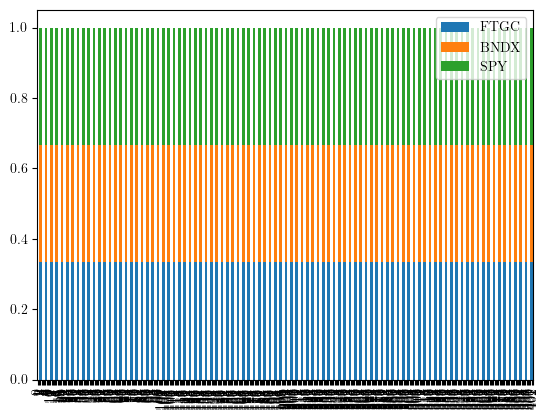

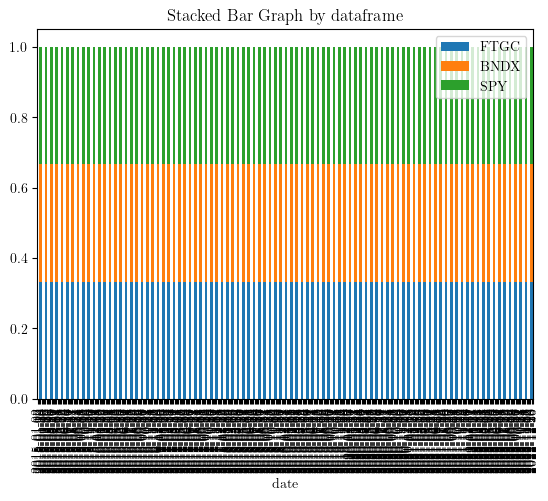

In [184]:
ax = EW_value_holdings.plot.bar(stacked=True)
ax = EW_value_holdings.plot(x='date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')

dates = list(EW_value_holdings['date'])
xticks = []
for i in range(0,len(dates),5):
    xticks = xticks + [dates[i]]

ax.set_xticks(xticks)

In [200]:
ax

<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='date'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


EW
         date      FTGC      BNDX       SPY
0  2015-01-02  0.333333  0.333333  0.333333
1  2015-01-09  0.333333  0.333333  0.333333
2  2015-01-16  0.333333  0.333333  0.333333
3  2015-01-23  0.333333  0.333333  0.333333
4  2015-01-30  0.333333  0.333333  0.333333


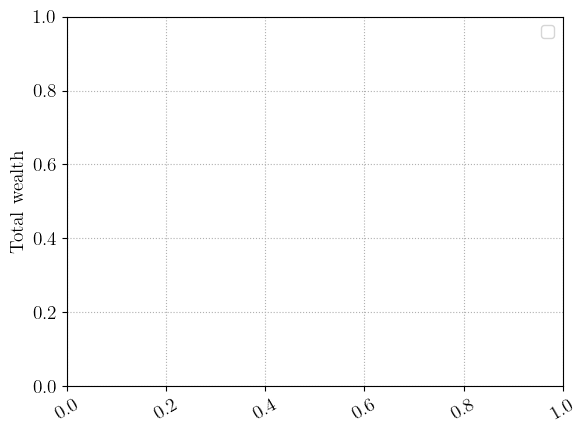

In [132]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_holdings, RP_value_holdings, NN_value_holdings, TTrain_value_holdings]
for indx, frame in enumerate(frames):
    print(names[indx])
    print(frame.head())
    # frame.plot.bar()
    # plt.plot(label=names[indx])
    break
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)
